In [1]:
from math import pi
import numpy
%matplotlib inline
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
ni=41
nj=41
xmin=0
xmax=1
ymin=0
ymax=1
e_target=2e-5

In [3]:
def poisson_IG(nx,ny,xmax,xmin,ymax,ymin):
    dx=(xmax-xmin)/(nx-1)
    dy=(ymax-ymin)/(ny-1)
    x=numpy.linspace(xmin,xmax,nx)
    y=numpy.linspace(ymin,ymax,ny)
    X,Y=numpy.meshgrid(x,y)
    n=(min(ni,nj)-1)/2
    f=-(2*pi*n)**2*numpy.sin(2*pi*n*X)*numpy.sin(2*pi*n*Y)
    u0=numpy.zeros((ny,nx))
    return X,Y,x,y,u0,f,dx,dy,n

In [4]:
def poisson(u,f,dx,dy,r_target):
    e_norm=1
    iterations=0
    e_conv=[]
    while e_norm>e_target:
        ud=u.copy()
        u[1:-1,1:-1]=1/(2*(dx**2+dy**2))*\
                      ((ud[1:-1,2:]+ud[1:-1,:-2])*dy**2+\
                       (ud[2:,1:-1]+ud[:-2,1:-1])*dx**2-\
                        f[1:-1,1:-1]*dx**2*dy**2)
        e_norm=numpy.sum((u-u_exact)**2)
        iterations+=1
        e_conv.append(e_norm)
    print('Number of Jacobi iterations: {0:d}'.format(iterations))
    return u,e_conv

In [5]:
def plot_3D(x, y, u):    
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,u[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$u$')
    ax.view_init(45,45)

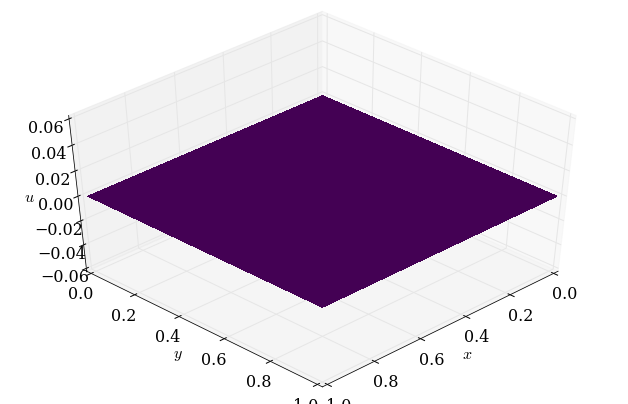

In [6]:
X,Y,x,y,u0,f,dx,dy,n=poisson_IG(ni,nj,xmax,xmin,ymax,ymin)
plot_3D(x,y,u0)

In [7]:
u_exact=numpy.zeros((nj,ni))
for j in range(nj):
    for i in range(ni):
        u_exact[j,i]=numpy.sin(2*pi*n*(i*dx-xmin))*numpy.sin(2*pi*n*(j*dy-ymin))

In [8]:
u,e_conv=poisson(u0.copy(),f,dx,dy,e_target)

Number of Jacobi iterations: 1
